# PANDAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Définir un objet Series comprenant la population de 4 pays puis afficher les pays ayant une population > 50’000’000.


In [2]:
ser_population=pd.Series([70,300,8,1400],index=["France","USA","Suisse","Chine"])

In [3]:
ser_population[ser_population>50]

France      70
USA        300
Chine     1400
dtype: int64

In [4]:
ser_population[(ser_population>50)&(ser_population<200)]

France    70
dtype: int64

In [5]:
'Chine' in ser_population

True

Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [6]:
ser_population.name="Populations"
ser_population.index.name="Pays"

In [7]:
ser_population

Pays
France      70
USA        300
Suisse       8
Chine     1400
Name: Populations, dtype: int64

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui.


In [8]:
import datetime

In [9]:
dates=pd.date_range("2017-10-03",datetime.date.today(),freq="D")

In [10]:
ser_action=pd.Series(np.random.random(len(dates))*10,index=dates)

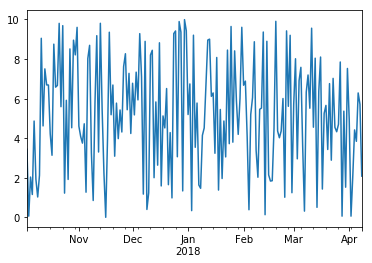

In [11]:
ser_action.plot()

In [12]:
dates

DatetimeIndex(['2017-10-03', '2017-10-04', '2017-10-05', '2017-10-06',
               '2017-10-07', '2017-10-08', '2017-10-09', '2017-10-10',
               '2017-10-11', '2017-10-12',
               ...
               '2018-03-30', '2018-03-31', '2018-04-01', '2018-04-02',
               '2018-04-03', '2018-04-04', '2018-04-05', '2018-04-06',
               '2018-04-07', '2018-04-08'],
              dtype='datetime64[ns]', length=188, freq='D')

In [13]:
frame_action=ser_action.to_frame()

In [14]:
frame_action[0]

2017-10-03    3.441666
2017-10-04    0.064020
2017-10-05    2.038370
2017-10-06    1.157471
2017-10-07    4.868558
2017-10-08    1.926520
2017-10-09    1.031871
2017-10-10    2.130070
2017-10-11    9.049114
2017-10-12    4.621537
2017-10-13    7.503371
2017-10-14    6.694621
2017-10-15    6.687915
2017-10-16    4.222084
2017-10-17    3.139199
2017-10-18    8.752406
2017-10-19    6.580838
2017-10-20    6.665891
2017-10-21    9.803540
2017-10-22    5.593633
2017-10-23    9.687252
2017-10-24    1.226219
2017-10-25    5.916335
2017-10-26    1.918425
2017-10-27    8.511975
2017-10-28    4.527880
2017-10-29    8.953366
2017-10-30    8.210225
2017-10-31    9.601363
2017-11-01    4.609649
                ...   
2018-03-10    5.515666
2018-03-11    9.559275
2018-03-12    4.556753
2018-03-13    8.043430
2018-03-14    0.508455
2018-03-15    6.370884
2018-03-16    8.101948
2018-03-17    1.432265
2018-03-18    5.255473
2018-03-19    5.658186
2018-03-20    3.432066
2018-03-21    6.759062
2018-03-22 

Créez un objet Series avec des résultats par trimestres à partir de 2012.


In [15]:
periodes=pd.period_range("2012-02",datetime.date.today(),freq="Q")
periodes

PeriodIndex(['2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2',
             '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4',
             '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2',
             '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4',
             '2018Q1', '2018Q2'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [16]:
ser_resultats=pd.Series(np.arange(len(periodes))+np.random.random(len(periodes))*10,index=periodes)

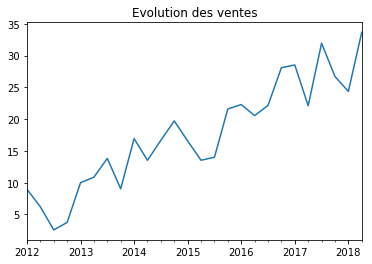

In [17]:
ser_resultats.plot(title="Evolution des ventes")

Récupérez les données de Wikipédia sur les résultats de NBA et obtenir les statistiques descriptives pour les variables quantitatives.
On utilisera plutôt Chrome ou Firefox pour ce type de tâches (éviter IE)


In [18]:
import webbrowser
url='https://en.wikipedia.org/wiki/List_of_all-time_NBA_win-loss_records'
webbrowser.open(url)

True

In [19]:
frame_nba=pd.read_clipboard()

In [20]:
frame_nba.head()

,Rank,Team,Won,Lost,Pct.,First NBA season,Total games,Division
0,1,San Antonio Spurs,"2,067","1,247",0.624,1976–77,"3,314",Southwest
1,2,Los Angeles Lakers,"3,261","2,190",0.598,1948–49,"5,451",Pacific
2,3,Boston Celtics,"3,274","2,286",0.589,1946–47,"5,560",Atlantic
3,4,Phoenix Suns,"2,146","1,824",0.541,1968–69,"3,970",Pacific
4,5,Oklahoma City Thunder,"2,186","1,866",0.539,1967–68,"4,052",Northwest


In [21]:
frame_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
Rank                30 non-null int64
Team                30 non-null object
Won                 30 non-null object
Lost                30 non-null object
Pct.                30 non-null float64
First NBA season    30 non-null object
Total games         30 non-null object
Division            30 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ KB


On voit que certaines colonnes sont mal codées :
    - les virgules sont en fait des séparateurs de milliers

In [22]:
#on définit une fonction de préparation
def prep_donnes_nba(frame):
    for col in frame.columns:
        if frame[col].dtype==object:
            frame[col]=pd.to_numeric(frame[col].str.replace(",",""),errors="ignore")
    return frame

In [23]:
prep_donnes_nba(frame_nba)

,Rank,Team,Won,Lost,Pct.,First NBA season,Total games,Division
0,1,San Antonio Spurs,2067,1247,0.624,1976–77,3314,Southwest
1,2,Los Angeles Lakers,3261,2190,0.598,1948–49,5451,Pacific
2,3,Boston Celtics,3274,2286,0.589,1946–47,5560,Atlantic
3,4,Phoenix Suns,2146,1824,0.541,1968–69,3970,Pacific
4,5,Oklahoma City Thunder,2186,1866,0.539,1967–68,4052,Northwest
5,6,Utah Jazz,1866,1612,0.537,1974–75,3478,Northwest
6,7,Portland Trail Blazers,2032,1774,0.534,1970–71,3806,Northwest
7,8,Chicago Bulls,2156,1977,0.522,1966–67,4133,Central
8,9,Houston Rockets,2107,1945,0.520,1967–68,4052,Southwest
9,10,Miami Heat,1211,1119,0.520,1988–89,2330,Southeast


In [24]:
#on affiche des statistiques descriptives
frame_nba.describe(include="all")

,Rank,Team,Won,Lost,Pct.,First NBA season,Total games,Division
count,30.000000,30,30.000000,30.000000,30.000000,30,30.000000,30
unique,NaN,30,NaN,NaN,NaN,16,NaN,6
top,NaN,Dallas Mavericks,NaN,NaN,NaN,1976–77,NaN,Pacific
freq,NaN,1,NaN,NaN,NaN,4,NaN,5
mean,15.500000,NaN,1893.966667,1884.833333,0.494300,NaN,3778.800000,NaN
std,8.803408,NaN,738.329311,632.328051,0.055334,NaN,1309.153541,NaN
min,1.000000,NaN,562.000000,652.000000,0.391000,NaN,1214.000000,NaN
25%,8.250000,NaN,1413.750000,1395.250000,0.459250,NaN,3067.750000,NaN
50%,15.500000,NaN,2028.500000,1900.000000,0.494500,NaN,3806.000000,NaN
75%,22.750000,NaN,2418.500000,2286.000000,0.521500,NaN,5172.750000,NaN


Trier les données NBA en fonction de la variable Pct.


In [25]:
frame_nba.sort_values("Pct.",ascending=True)

,Rank,Team,Won,Lost,Pct.,First NBA season,Total games,Division
29,30,Minnesota Timberwolves,878,1370,0.391,1989–90,2248,Northwest
28,29,Los Angeles Clippers,1520,2286,0.399,1970–71,3806,Pacific
27,28,Brooklyn Nets,1380,1934,0.416,1976–77,3314,Atlantic
26,27,Memphis Grizzlies,737,1019,0.420,1995–96,1756,Southwest
25,26,Charlotte Hornets,952,1214,0.440,1988–89[a],2166,Southeast
24,25,Toronto Raptors,785,971,0.447,1995–96,1756,Atlantic
23,24,Washington Wizards,2053,2480,0.453,1961–62,4533,Southeast
22,23,Sacramento Kings,2496,2955,0.458,1948–49,5451,Pacific
21,22,New Orleans Pelicans,562,652,0.463,2002–03[a],1214,Southwest
20,21,Cleveland Cavaliers,1779,2027,0.467,1970–71,3806,Central


Importez le fichier titanic_train.csv depuis Python dans titanic train.


In [26]:
titanic_train=pd.read_csv("../Data/titanic_train.csv")
titanic_test=pd.read_csv("../Data/titanic_test.csv")

In [27]:
titanic=pd.concat([titanic_test,titanic_train],axis=0)

In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [29]:
# on a la distribution des modalités de la variable cible 
titanic["Survived"].value_counts(dropna=False)

 0.0    549
NaN     418
 1.0    342
Name: Survived, dtype: int64

In [30]:
titanic["Pclass"].value_counts(dropna=False)

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [31]:
#on peut croiser deux variables
pd.crosstab(titanic["Survived"],titanic["Pclass"])

Pclass,1,2,3
Survived,,,
0.0,80,97,372
1.0,136,87,119


Importez un tableau en html depuis la page <br>
http://www.fdic.gov/bank/individual/failed/banklist.html 


In [32]:
bank=pd.read_html("http://www.fdic.gov/bank/individual/failed/banklist.html")

In [33]:
frame_bank=bank[0]

In [34]:
frame_bank.head(20)

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","February 21, 2018"
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017","February 21, 2018"
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","July 26, 2017"
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","March 22, 2018"
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017","December 5, 2017"
5,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,"March 3, 2017","March 7, 2018"
6,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,"January 27, 2017","May 18, 2017"
7,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,"January 13, 2017","May 18, 2017"
8,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","September 25, 2017"
9,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","June 1, 2017"


Importez un fichier Excel depuis python. On utilisera excel-data.xlsx et Presidentielle_2017_Resultats_Communes_Tour_1.xls

On a deux approches :
- avec pd.read_excel en connaissant la feuille qui nous intéresse
- avec pd.ExcelFile afin de créer un objet dans lequel on pourra avoir toutes les feuilles

In [35]:
frame_election=pd.read_excel("../Data/Presidentielle_2017_Resultats_Communes_Tour_1.xls")

In [36]:
excel_data=pd.ExcelFile("../Data/excel-data.xlsx")

In [37]:
excel_data.sheet_names

['sheet1']

In [38]:
frame_excel=excel_data.parse("sheet1")

In [39]:
frame_excel

,account,name,street,city,state,postal-code
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461
8,209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308


In [40]:
frame_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35496 entries, 0 to 35495
Data columns (total 95 columns):
Code du département       35496 non-null object
Libellé du département    35496 non-null object
Code de la commune        35496 non-null int64
Libellé de la commune     35496 non-null object
Inscrits                  35496 non-null int64
Abstentions               35496 non-null int64
% Abs/Ins                 35496 non-null float64
Votants                   35496 non-null int64
% Vot/Ins                 35496 non-null float64
Blancs                    35496 non-null int64
% Blancs/Ins              35496 non-null float64
% Blancs/Vot              35496 non-null float64
Nuls                      35496 non-null int64
% Nuls/Ins                35496 non-null float64
% Nuls/Vot                35496 non-null float64
Exprimés                  35496 non-null int64
% Exp/Ins                 35496 non-null float64
% Exp/Vot                 35496 non-null float64
N°Panneau                 

Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 


In [41]:
from sqlalchemy import create_engine

In [42]:
engine=create_engine("sqlite:///../Data/Salaries.sqlite")

In [43]:
engine.table_names()

['Salaries']

In [44]:
frame_salaries=pd.read_sql_query("Select * from Salaries",con=engine)

In [45]:
frame_salaries.shape

(148654, 13)

Il s'agit des salariés de la ville de San Francisco et de leurs salaires

In [46]:
frame_salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


Joindre les deux dataframes de ventes en utilisant l’id.


In [47]:
frame_ventes=pd.read_csv("../Data/demo_ventes.csv",sep=";")

In [48]:
frame_global=pd.merge(frame_ventes,frame_excel,on="account")

In [49]:
frame_global

,account,Jan,Feb,Mar,name,street,city,state,postal-code
0,211829,10000,62000,35000,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752
1,320563,95000,45000,35000,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365
2,648336,91000,120000,35000,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517
3,109996,45000,120000,10000,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021
4,121213,162000,120000,35000,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681
5,132971,150000,120000,35000,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785
6,145068,62000,120000,70000,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008
7,205217,145000,95000,35000,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461
8,209744,70000,95000,35000,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415
9,212303,70000,120000,35000,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308


Créez une variable dans le dataframe des ventes pour obtenir des niveaux de ventes.


In [50]:
#tailles d'intervalles constants
frame_salaries["salaires"]=pd.cut(frame_salaries["TotalPay"],bins=5)
#intervalles sur mesure
frame_salaries["salaires2"]=pd.cut(frame_salaries["TotalPay"],bins=[frame_salaries["TotalPay"].min()
                                                                   ,50000,100000,300000,
                                                                    frame_salaries["TotalPay"].max()])
#intervalles à effectifs constants
frame_salaries["salaires3"]=pd.qcut(frame_salaries["TotalPay"],5,labels=[1,2,3,4,5])

In [51]:
frame_salaries["salaires3"].value_counts().sort_index()

1    29731
2    29731
3    29730
4    29731
5    29731
Name: salaires3, dtype: int64

In [52]:
#on peut créer simplement une colonne
frame_salaries["2TotalPay"]=2*frame_salaries["TotalPay"]

## GROUPBY

- Données sur les salaires

- On utilise le groupby() pour rassembler les types d’emploi

- Et on calcule des statistiques pour chaque type

On peut utiliser la fonction .agg() avec par exemple ‘mean’ comme paramètre

On utilise aussi fréquemment la fonction apply() combinée à une fonction lambda


In [53]:
frame_salaries.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status', 'salaires', 'salaires2', 'salaires3', '2TotalPay'],
      dtype='object')

In [54]:
# nettoyage
frame_salaries["JobTitle"]=frame_salaries["JobTitle"].str.lower()

In [55]:
frame_salaries["JobTitle"].value_counts()

transit operator                                      9424
special nurse                                         5791
registered nurse                                      4955
custodian                                             3214
firefighter                                           3153
recreation leader                                     2663
deputy sheriff                                        2618
public svc aide-public works                          2518
police officer 3                                      2421
patient care assistant                                1945
public service trainee                                1656
attorney (civil/criminal)                             1503
police officer                                        1476
porter                                                1465
general laborer                                       1410
gardener                                              1187
police officer 2                                      11

In [56]:
frame_salaries.groupby("JobTitle")["TotalPay"].agg(["mean","count"]).sort_values("mean",
                                                                                 ascending=False)

,mean,count
JobTitle,,
general manager-metropolitan transit authority,399211.275000,2
chief investment officer,339653.700000,1
"chief, fire department",325971.683333,3
chief of police,313885.882500,4
deputy director of investments,307899.460000,1
"chief of department, (fire department)",302377.730000,1
"gen mgr, public trnsp dept",297769.413333,3
asst chf of dept (fire dept),281763.483889,18
"deputy chief of department,(fire department)",279359.560000,3


In [57]:
#on calcule l'écart entre le min et la max en utilisant une fonction lambda
frame_salaries.groupby("JobTitle")["TotalPay"].apply(lambda x : x.max()-x.min())\
.sort_values(ascending=False)

JobTitle
captain iii (police department)                       446979.91
asst med examiner                                     351271.98
lieutenant, fire suppression                          351198.08
emt/paramedic/firefighter                             337204.86
general manager-metropolitan transit authority        336768.31
electronic maintenance tech                           331779.65
senior physician specialist                           322582.27
deputy chief 3                                        322018.53
battlion chief, fire suppressi                        311433.08
battalion chief, (fire department)                    308887.68
deputy sheriff                                        308434.84
battalion chief, fire suppress                        307346.51
captain, fire suppression                             305410.42
transit manager 2                                     298925.33
inspector 3                                           294554.32
lieutenant 3                   